<a href="https://colab.research.google.com/github/paurbano/holbertonschool-machine_learning/blob/master/Transfer_learning_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 1.x
import tensorflow.keras as K
import numpy as np


def preprocess_data(X, Y):
    '''pre-processes the data
    Args:
        X is a numpy.ndarray of shape (m, 32, 32, 3) containing the
        CIFAR 10 data, where m is the number of data points
        Y is a numpy.ndarray of shape (m,) containing the CIFAR 10
        labels for X
    Returns: X_p, Y_p
        X_p is a numpy.ndarray containing the preprocessed X
        Y_p is a numpy.ndarray containing the preprocessed Y
    '''
    X = X / 255.0
    # X = tf.image.resize(image, (200, 200))
    Y = K.utils.to_categorical(Y, 10)
    return X, Y

# Load the dataset:
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
'''
x_train = x_train / 255.0
x_test = x_test / 255.0
# one hot encode the labels
y_train = K.utils.to_categorical(y_train, 10)
y_test = K.utils.to_categorical(y_test, 10)
'''
# preprocess data
x_train, y_train = preprocess_data(x_train, y_train)
x_test , y_test = preprocess_data(x_test, y_test)

# load model without output layer include_top=False
# ResNet50
base_model = K.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# freeze model
base_model.trainable = False

# transfer learning model
# the input image of Cifar10 is 32x32 so it needs to be upscaled 3 times
# before we can pass it through the ResNet layers
model = K.Sequential()
model.add(K.layers.UpSampling2D((2,2)))
model.add(K.layers.UpSampling2D((2,2)))
model.add(K.layers.UpSampling2D((2,2)))
model.add(base_model)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(64, activation='relu'))
# model.add(K.layers.GlobalAveragePooling2D())
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(10, activation='softmax'))

# summarize model
# model.summary()

# model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=K.optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_data=(x_test, y_test))

model.save('cifar10.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 184s 4ms/sample - loss: 0.2696 - acc: 0.9051 - val_loss: 0.3622 - val_acc: 0.9000
Epoch 2/5
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.2138 - acc: 0.9209 - val_loss: 0.3586 - val_acc: 0.9000
Epoch 3/5
50000/50000 [==============================] - 174s 3ms/sample - loss: 0.1907 - acc: 0.9293 - val_loss: 0.3552 - val_acc: 0.9000
Epoch 4/5
50000/50000 [==============================] - 172s 3ms/sample - loss: 0.1761 - acc: 0.9346 - val_loss: 0.3529 - val_acc: 0.9000
Epoch 5/5
50000/50000 [==============================] - 171s 3ms/sample - loss: 0.1643 - acc: 0.9391 - val_loss: 0.3582 - val_acc: 0.9000


In [4]:
my_model = K.models.load_model('cifar10.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
my_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 25s 2ms/sample - loss: 0.3582 - acc: 0.9000


[0.35816613264083863, 0.8999973]

In [6]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
batch_normalization_3 (Batch multiple                  524288    
_________________________________________________________________
dense_3 (Dense)              multiple                 

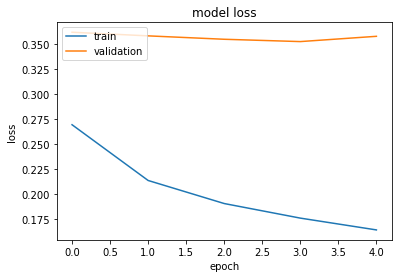

In [9]:
import matplotlib.pyplot as plt
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(history)